<a href="https://colab.research.google.com/github/ayanban011/Getting-Started_with_Pytorch/blob/main/Intro_to_process_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import packages and load the MNIST Dataset**

In [1]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the dataset
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### **Visualizing the dataset**

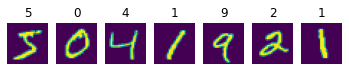

In [3]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

### **Dataset structure**

In [4]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [5]:
# Pixel Intensity Range
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


### **Training a simple dense neural network**
Let's bring a twist in the game. Let's load all the data with *pytorchcv* and take a lesson on it.

In [6]:
#downloading the pytorchcv
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-06-24 14:36:49--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2022-06-24 14:36:49 (65.1 MB/s) - ‘pytorchcv.py’ saved [6371/6371]



In [9]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from pytorchcv import load_mnist, plot_results
load_mnist()

### **Fully-connected dense neural networks**

In [11]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

### **Training the Network**

In [12]:
# without Training trying to map
print('Digit to be predicted: ',data_train[0][1])
torch.exp(net(data_train[0][0]))

Digit to be predicted:  5


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.1523, 0.0875, 0.1173, 0.0991, 0.1013, 0.1076, 0.0977, 0.0767, 0.0574,
         0.1034]], grad_fn=<ExpBackward0>)

In [13]:
# define the batch size for training with the dataloader
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64) # we can use larger batch size for testing

In [14]:
# function for training
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count

train_epoch(net,train_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.005931583658854166, 0.8928)

In [15]:
# Function to validate
def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels) 
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

validate(net,test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.0058686290740966795, 0.8933)

In [16]:
#Checking the Overfitting
def train(net,train_loader,test_loader,optimizer=None,lr=0.001,epochs=100,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

# Re-initialize the network to start from scratch
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

hist = train(net,train_loader,test_loader,epochs=100)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 0, Train acc=0.867, Val acc=0.908, Train loss=0.009, Val loss=0.005
Epoch 1, Train acc=0.909, Val acc=0.917, Train loss=0.005, Val loss=0.005
Epoch 2, Train acc=0.916, Val acc=0.920, Train loss=0.005, Val loss=0.004
Epoch 3, Train acc=0.920, Val acc=0.922, Train loss=0.004, Val loss=0.004
Epoch 4, Train acc=0.923, Val acc=0.924, Train loss=0.004, Val loss=0.004
Epoch 5, Train acc=0.924, Val acc=0.925, Train loss=0.004, Val loss=0.004
Epoch 6, Train acc=0.925, Val acc=0.926, Train loss=0.004, Val loss=0.004
Epoch 7, Train acc=0.926, Val acc=0.926, Train loss=0.004, Val loss=0.004
Epoch 8, Train acc=0.927, Val acc=0.926, Train loss=0.004, Val loss=0.004
Epoch 9, Train acc=0.928, Val acc=0.926, Train loss=0.004, Val loss=0.004
Epoch 10, Train acc=0.929, Val acc=0.925, Train loss=0.004, Val loss=0.004
Epoch 11, Train acc=0.930, Val acc=0.925, Train loss=0.004, Val loss=0.004
Epoch 12, Train acc=0.930, Val acc=0.925, Train loss=0.004, Val loss=0.004
Epoch 13, Train acc=0.931, Val acc=

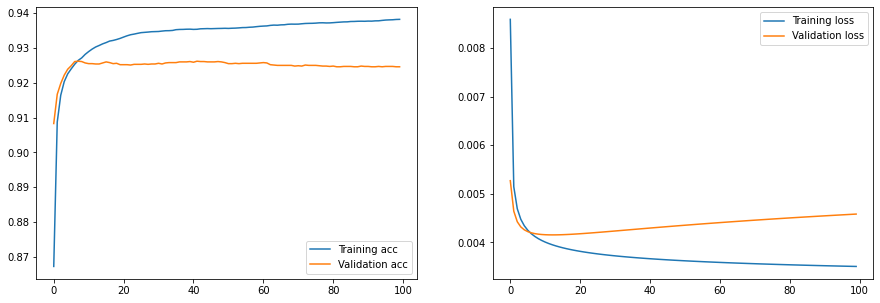

In [17]:
# Visualizing the model training and testing accuracy
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()

### **Visualizing the network weights**

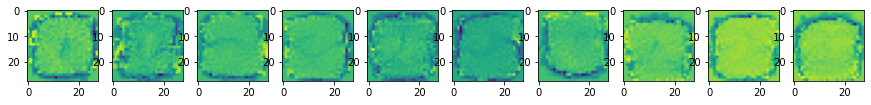

In [18]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i,x in enumerate(weight_tensor):
    ax[i].imshow(x.view(28,28).detach())

### **Multilayer Perceptron**

In [19]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

In [20]:
# Same representation with another syntax
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.out = nn.Linear(100,10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x,dim=0)
        return x

net = MyNet()

summary(net,input_size=(1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch 0, Train acc=0.949, Val acc=0.956, Train loss=0.034, Val loss=0.033
Epoch 1, Train acc=0.962, Val acc=0.963, Train loss=0.033, Val loss=0.032
Epoch 2, Train acc=0.969, Val acc=0.966, Train loss=0.032, Val loss=0.032
Epoch 3, Train acc=0.973, Val acc=0.967, Train loss=0.032, Val loss=0.032
Epoch 4, Train acc=0.977, Val acc=0.969, Train loss=0.032, Val loss=0.032
Epoch 5, Train acc=0.979, Val acc=0.971, Train loss=0.032, Val loss=0.032
Epoch 6, Train acc=0.981, Val acc=0.971, Train loss=0.031, Val loss=0.032
Epoch 7, Train acc=0.983, Val acc=0.972, Train loss=0.031, Val loss=0.032
Epoch 8, Train acc=0.985, Val acc=0.973, Train loss=0.031, Val loss=0.032
Epoch 9, Train acc=0.986, Val acc=0.973, Train loss=0.031, Val loss=0.032
Epoch 10, Train acc=0.987, Val acc=0.973, Train loss=0.031, Val loss=0.032
Epoch 11, Train acc=0.988, Val acc=0.972, Train loss=0.031, Val loss=0.032
Epoch 12, Train acc=0.989, Val acc=0.972, Train loss=0.031, Val loss=0.032
Epoch 13, Train acc=0.989, Val acc=

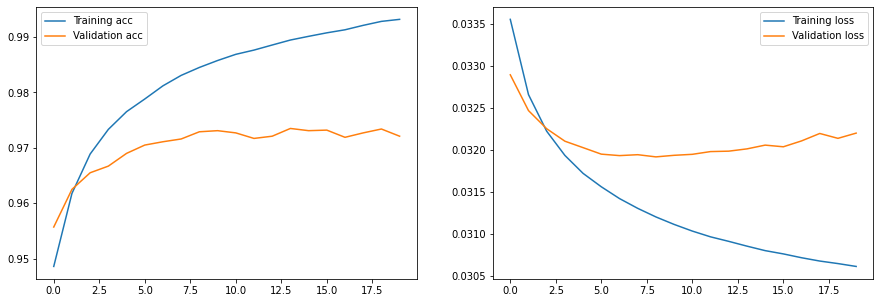

In [22]:
# Train the multilayer perceptron
hist = train(net,train_loader,test_loader,epochs=20)
plot_results(hist)

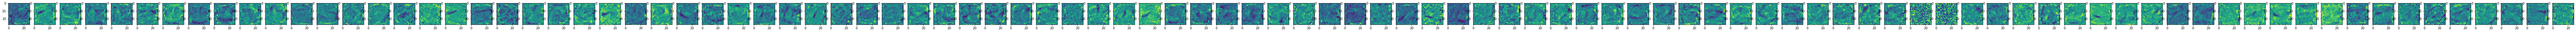

In [27]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,100,figsize=(150,40))
for i,x in enumerate(weight_tensor):
    ax[i].imshow(x.view(28,28).detach())